In [2]:
from datascience import *
import numpy as np
## Normal Distribution
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
from IPython.display import Image
from IPython.core.display import HTML 

## Review: Correlation

In [4]:
# helper methods:

def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers)) / np.std(any_numbers)  

def standardize(t):
    """Return a table in which all columns of t are converted to standard units."""
    t_su = Table()
    for label in t.labels:
        t_su = t_su.with_column(label + ' (su)', standard_units(t.column(label)))
    return t_su

In [5]:
def correlation(t, label_x, label_y):
    return np.mean(standard_units(t.column(label_x))*standard_units(t.column(label_y)))

In [31]:
#Discussion Question

small_table = Table().with_columns('x', [1, 2, 3, 4, 5], 'y', [1, 2, 3, 4, 0])
correlation(small_table, 'x', 'y')

0.0

## Regression Line

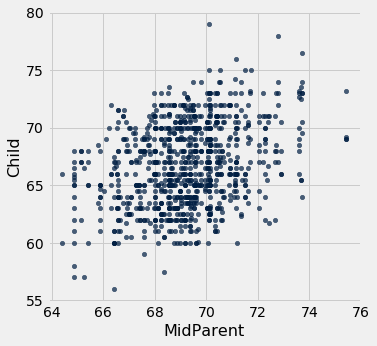

In [8]:
# Reminder:

#http://inferentialthinking.com/notebooks/galton.csv
galton = Table.read_table('galton.csv')



heights = Table().with_columns(
    'MidParent', galton.column('midparentHeight'),
    'Child', galton.column('childHeight')
    )

heights.scatter(0)


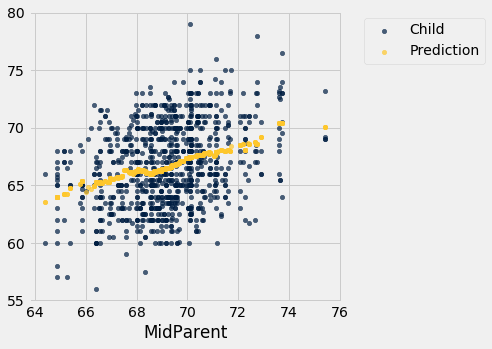

In [9]:
#prediction

def predict_child(parent):
    """Return a prediction of the height of a child 
    whose parents have a midparent height of parent.
    
    The prediction is the average height of the children 
    whose midparent height is in the range mpht plus or minus 0.5 inches.
    """
    close_points = heights.where('MidParent', are.between(parent - 0.5, parent + 0.5))
    return close_points.column('Child').mean()

heights_and_predict = heights.with_column(
    'Prediction', heights.apply(predict_child, 'MidParent')
)

heights_and_predict.scatter(0)

Trying to discover equation for yellow curve - would like a perfect line


In [10]:
# How strong is the linear trend?

correlation(heights_and_predict, 'MidParent', 'Child')

0.32094989606395924

(-4, 4)

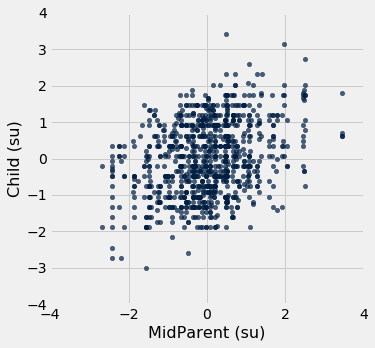

In [11]:
# We take our heights and convert them to standard units:

standardize(heights).scatter(0)
plots.xlim(-4, 4)
plots.ylim(-4, 4)

When converting to standard units, only axes change, shape is same

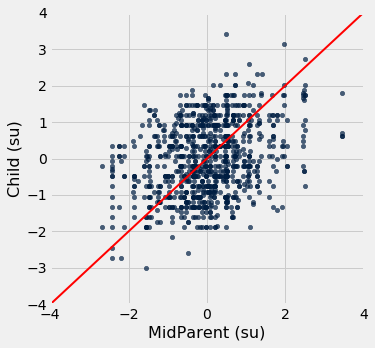

In [12]:
# Plot a natural line of symmetry, 45 degree angle (y=x). Is this a good prediction line?

standardize(heights).scatter(0)
plots.xlim(-4, 4)
plots.ylim(-4, 4)
plots.plot([-4, 4], [-4, 4], color='r', lw=2)


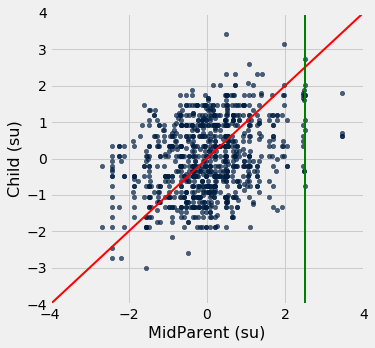

In [13]:
# green line: drawn at particular x value that I want to predict

standardize(heights).scatter(0)
plots.xlim(-4, 4)
plots.ylim(-4, 4)
plots.plot([-4, 4], [-4, 4], color='r', lw=2)
plots.plot([2.5, 2.5], [-4, 4], color='g', lw=2)

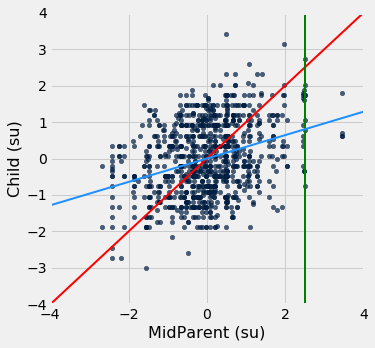

In [14]:
#blue line goes through centers of vertical strips - it is flatter

standardize(heights).scatter(0)
plots.xlim(-4, 4)
plots.ylim(-4, 4)
plots.plot([-4, 4], [-4, 4], color='r', lw=2)
plots.plot([2.5, 2.5], [-4, 4], color='g', lw=2)

r = correlation(heights, 0, 1)
plots.plot([-4, 4], [-4*r, 4*r], color='dodgerblue', lw=2)

Notice that blue and red lines both go through (0,0). Why is this reasonable?

What is slope of blue line? 

Positive or negative? 

More or less than one?

Blue line is called a regression line, goes through middle points

Can you find equation of a line that goes through origin with a given slope?

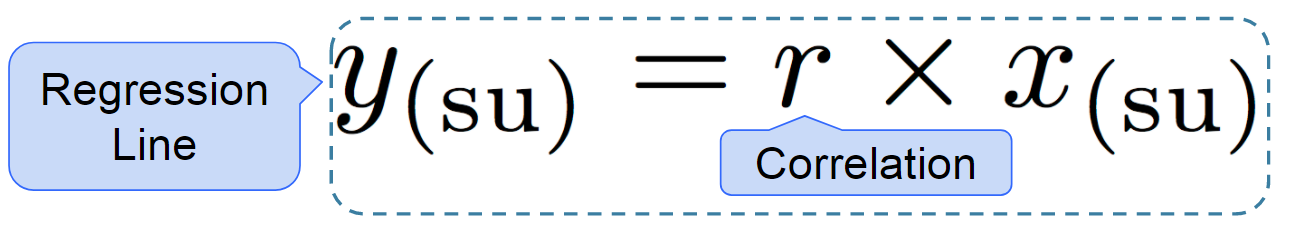

In [15]:
Image("image3.png", width=700, height=150)

back to slides - graph of averages

## Regression Line for Prediction

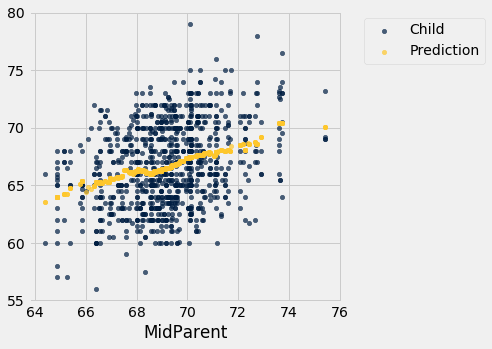

In [16]:
# Question: How does the regression line compare to our original prediction?

heights_and_predict.scatter(0)

In [17]:
r = correlation(heights_and_predict, 'MidParent', 'Child')
parent_mean = np.mean(heights.column('MidParent'))
parent_sd = np.std(heights.column('MidParent'))
child_mean = np.mean(heights.column('Child'))
child_sd = np.std(heights.column('Child'))

In [18]:
def predict_with_r(parent):
    """Return a prediction of the height of a child 
    whose parents have a midparent height of parent, 
    using linear regression.
    """
    parent_su = (parent - parent_mean) / parent_sd
    child_su = r * parent_su
    return child_su * child_sd + child_mean

In [19]:
# Parent -> child 

predict_with_r(68)

65.976781543514321

In [20]:
# Parent -> child 

predict_with_r(74)

69.800946925331189

In [21]:
# Parent -> child 

predict_with_r(60)

60.877894367758486

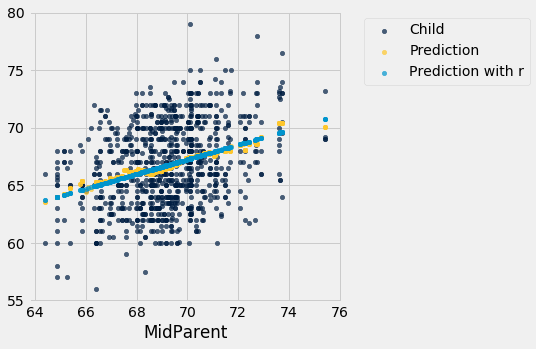

In [22]:
#Now with all the midparent heights

heights_and_predict.with_column(
    'Prediction with r', 
    heights_and_predict.apply(predict_with_r, 'MidParent')).scatter(0)


back to slides - slope and intercept

## Slope and Intercept

In [23]:
# How to work in original units?

def correlation(t, x, y):
    return np.mean(standard_units(t.column(x))*standard_units(t.column(y)))

def slope(t, x, y):
    """The slope of the regression line (original units)"""
    r = correlation(t, x, y)
    return r * np.std(t.column(y)) / np.std(t.column(x))

def intercept(t, x, y):
    """The intercept of the regression line (original units)"""
    return np.mean(t.column(y)) - slope(t, x, y) * np.mean(t.column(x))


5067.66110596 -21282.1740687


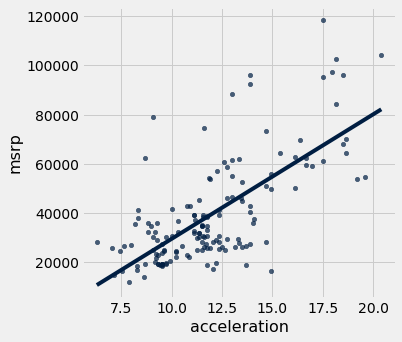

In [26]:
#http://inferentialthinking.com/notebooks/hybrid.csv
hybrid = Table.read_table('hybrid.csv')
hybrid.scatter('acceleration', 'msrp', fit_line = True)

# Make predictions with the line y=ax+b

m = slope(hybrid, 'acceleration', 'msrp')
b = intercept(hybrid, 'acceleration', 'msrp')

print(m, b)

In [27]:
# Predict the retail price of a hybrid with acceleration of 12.5

m*12.5+b

42063.589755741108

For each additional unit of acceleration (km per hour per sec), how does the price change?

## Least Squares

In [35]:
#little_women = Table.read_table('http://inferentialthinking.com/notebooks/little_women.csv')
little_women = Table.read_table('little_women.csv')

little_women = little_women.move_to_start('Periods')
little_women.show(3)

Periods,Characters
189,21759
188,22148
231,20558


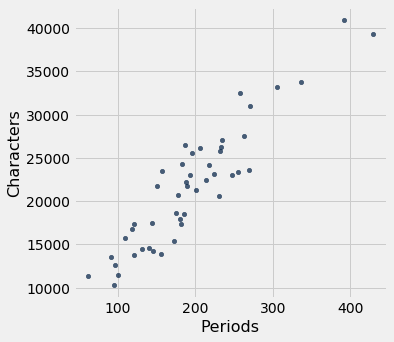

In [36]:
little_women.scatter('Periods', 'Characters')

In [37]:
# What correlation do you expect?

correlation(little_women, 'Periods', 'Characters')

0.92295768958548163

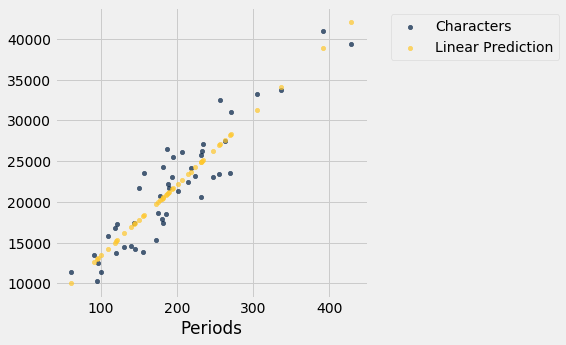

In [32]:
# helper method

def fit(t, x, y):
    """Return the predicted y-value for each x-value"""
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a * t.column(x) + b

fitted = fit(little_women, 'Periods', 'Characters')  # array of predictions

lw_with_predictions = little_women.with_column('Linear Prediction', fitted) #table
lw_with_predictions.scatter('Periods')  #plot

In [33]:
# errors: 

actual = lw_with_predictions.column('Characters')
predicted = lw_with_predictions.column('Linear Prediction')
errors = actual - predicted

lw_with_predictions.with_column("Error", errors)

Periods,Characters,Linear Prediction,Error
189,21759,21183.6,575.403
188,22148,21096.6,1051.38
231,20558,24836.7,-4278.67
195,25526,21705.5,3820.54
255,23395,26924.1,-3529.13
140,14622,16921.7,-2299.68
131,14431,16138.9,-1707.88
214,22476,23358,-882.043
337,33767,34056.3,-289.317
185,18508,20835.7,-2327.69


In [39]:
#function to draw errors

sample = [[131, 14431], [231, 20558], [392, 40935], [157, 23524]]
def lw_errors(slope, intercept):
    print('Slope of Regression Line:    ', np.round(slope), 'characters per period')
    print('Intercept of Regression Line:', np.round(intercept), 'characters')
    little_women.scatter('Periods', 'Characters')
    xlims = np.array([50, 450])
    plots.plot(xlims, slope * xlims + intercept, lw=2)
    for x, y in sample:
        plots.plot([x, x], [y, slope * x + intercept], color='r', lw=2)


Slope of Regression Line:     87.0 characters per period
Intercept of Regression Line: 4745.0 characters


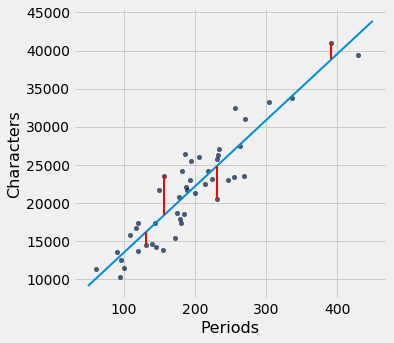

In [42]:
#slope, intercept and errors:

lw_reg_slope = slope(little_women, 'Periods', 'Characters')
lw_reg_intercept = intercept(little_women, 'Periods', 'Characters')
lw_errors(lw_reg_slope, lw_reg_intercept)

Slope of Regression Line:     50 characters per period
Intercept of Regression Line: 10000 characters


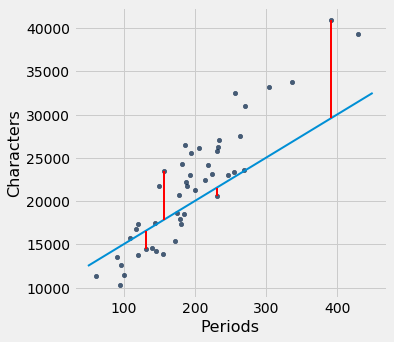

In [43]:
# takes any slope, any intercept and redraws the line and errors from the same 4 points

lw_errors(50, 10000)

Slope of Regression Line:     -100 characters per period
Intercept of Regression Line: 50000 characters


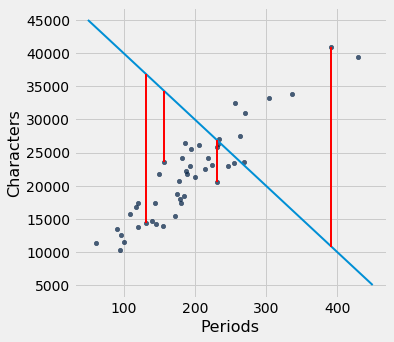

In [44]:
lw_errors(-100, 50000)

Which lines are better? The ones with small errors.

Goal: Find the line that minimizes the error.

What exactly will we minimize? 

back to slides for Error in Estimation

In [46]:
def lw_rmse(slope, intercept):
    lw_errors(slope, intercept)
    x = little_women.column('Periods')
    y = little_women.column('Characters')
    fitted = slope * x + intercept
    mse = np.mean((y - fitted) ** 2)
    print("Root mean squared error:", mse ** 0.5)

Slope of Regression Line:     50 characters per period
Intercept of Regression Line: 10000 characters
Root mean squared error: 4322.16783177


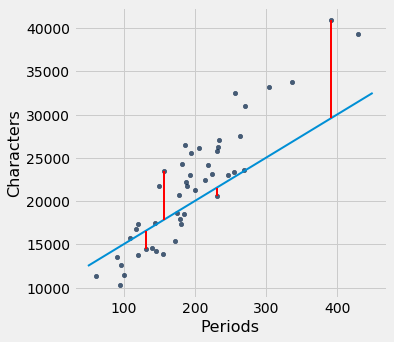

In [47]:
# is the error small or large?
lw_rmse(50, 10000)

Slope of Regression Line:     -100 characters per period
Intercept of Regression Line: 50000 characters
Root mean squared error: 16710.1198374


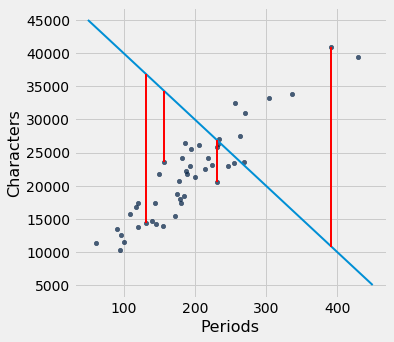

In [48]:
# for comparison

lw_rmse(-100, 50000)

Slope of Regression Line:     90 characters per period
Intercept of Regression Line: 4000 characters
Root mean squared error: 2715.53910638


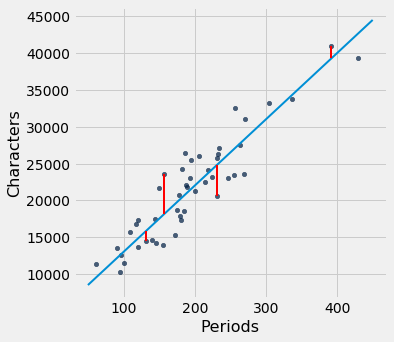

In [49]:
# close to the regression line
lw_rmse(90, 4000)

Slope of Regression Line:     87.0 characters per period
Intercept of Regression Line: 4745.0 characters
Root mean squared error: 2701.69078531


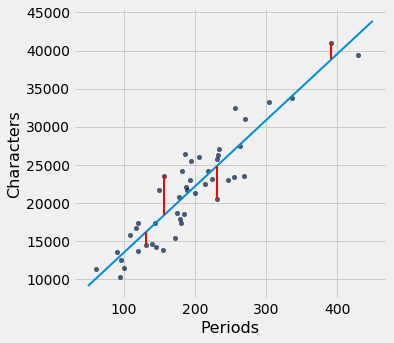

In [50]:
lw_rmse(lw_reg_slope, lw_reg_intercept)

back to slides for Least Squares Line and Numerical Optimization

In [51]:
# drop the square root

def lw_mse(any_slope, any_intercept):
    x = little_women.column('Periods')
    y = little_women.column('Characters')
    fitted = any_slope*x + any_intercept
    return np.mean((y - fitted) ** 2)

In [52]:
# What is it going to return?

minimize(lw_mse)

array([   86.97784117,  4744.78484535])

In [53]:
lw_reg_slope, lw_reg_intercept

(86.977841258298213, 4744.7847965749279)

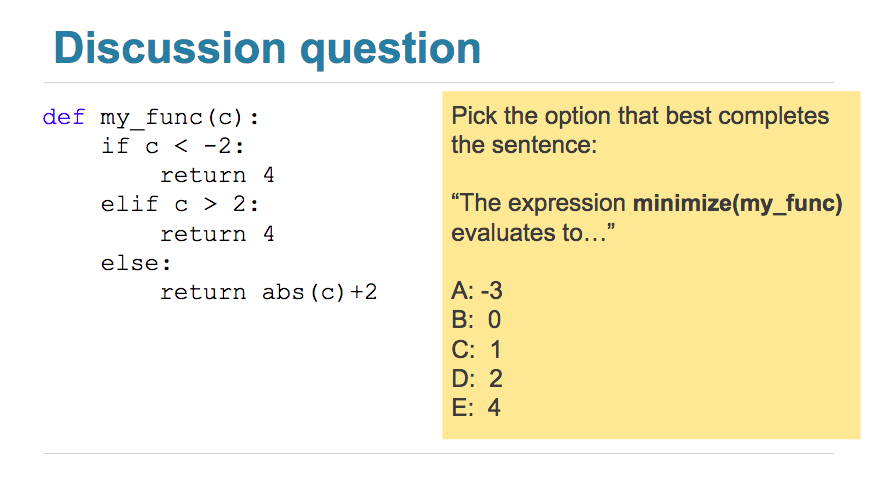

In [54]:
# Discussion question

Image("image_minim.png", width=700, height=150)